<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/EDA_on_UCI_Obesity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔎 Structure & Content Discoveries on Dataset about Obesity Levels in  Mexico, Peru, and Colombia


---

## 🔎 **Goal**
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

Data profiling serves three high-level objectives: structure discovery, content discovery, and relationship discovery.

Our goal is to achieve all three objectives of Data profiling .

## 📝 Let's Import Necessary Libraries

In [12]:
import pandas as pd

import zipfile
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 	📝 Let's load the dataset

Source : [Machine Learning Repository of the University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic (2).zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('obesity')

df = pd.read_csv('/content/obesity/ObesityDataSet_raw_and_data_sinthetic.csv')

# 📝 Let's explore our Dataset

In [24]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
df.shape

(2111, 17)

Our dataset has 17 columns and 2111 rows

In [17]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Column descriptions:

* FAVC : Consume high-calorie foods frequently

* FCVC : Number of meals where you usually eat vegetables

* NCP : Number of main meals a day

* CAEC : Eat food between meals

* CH2O : Liters of water you drink a day

* SCC : Monitor the calories you consume daily

* FAF : Frequency of days per week that you often have physical activity

* TUE : Time of use of technological devices on a daily basis

* CALC : Frequency of alcohol intake.

* MTRANS : Means of transportation that you use regularly

* NObeyesdad : BMI (Target Variable)


Source : https://www.sciencedirect.com/science/article/pii/S2352914822000521

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [27]:
# Statistics of numerical columns
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* Age lies between 14 to 61, which is good because it means no issues with it.
75 % percentile is 26, data must be mostly populated with younger population 
* height, weight look fine.

In [38]:
# Stats on Categorical columns
df.describe(include = object)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


* In the Dataset, more than 80% have some family history with overweight issues.


Let's check if data has empty values

In [29]:
df.isna().sum().sum()

0

Small win!!

Let's check if data has any duplicates

In [32]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


We need to remove all duplicates except the first

In [36]:
df.drop_duplicates(inplace = True, keep='first')

Let's check how many unique values are present per column

In [33]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

Let's calculate BMI and drop Height and Weight columns

In [62]:
df['BMI'] = df['Weight']/(df['Height']**2)

In [65]:
del df['Weight'], df['Height']

## 📝 Visualization

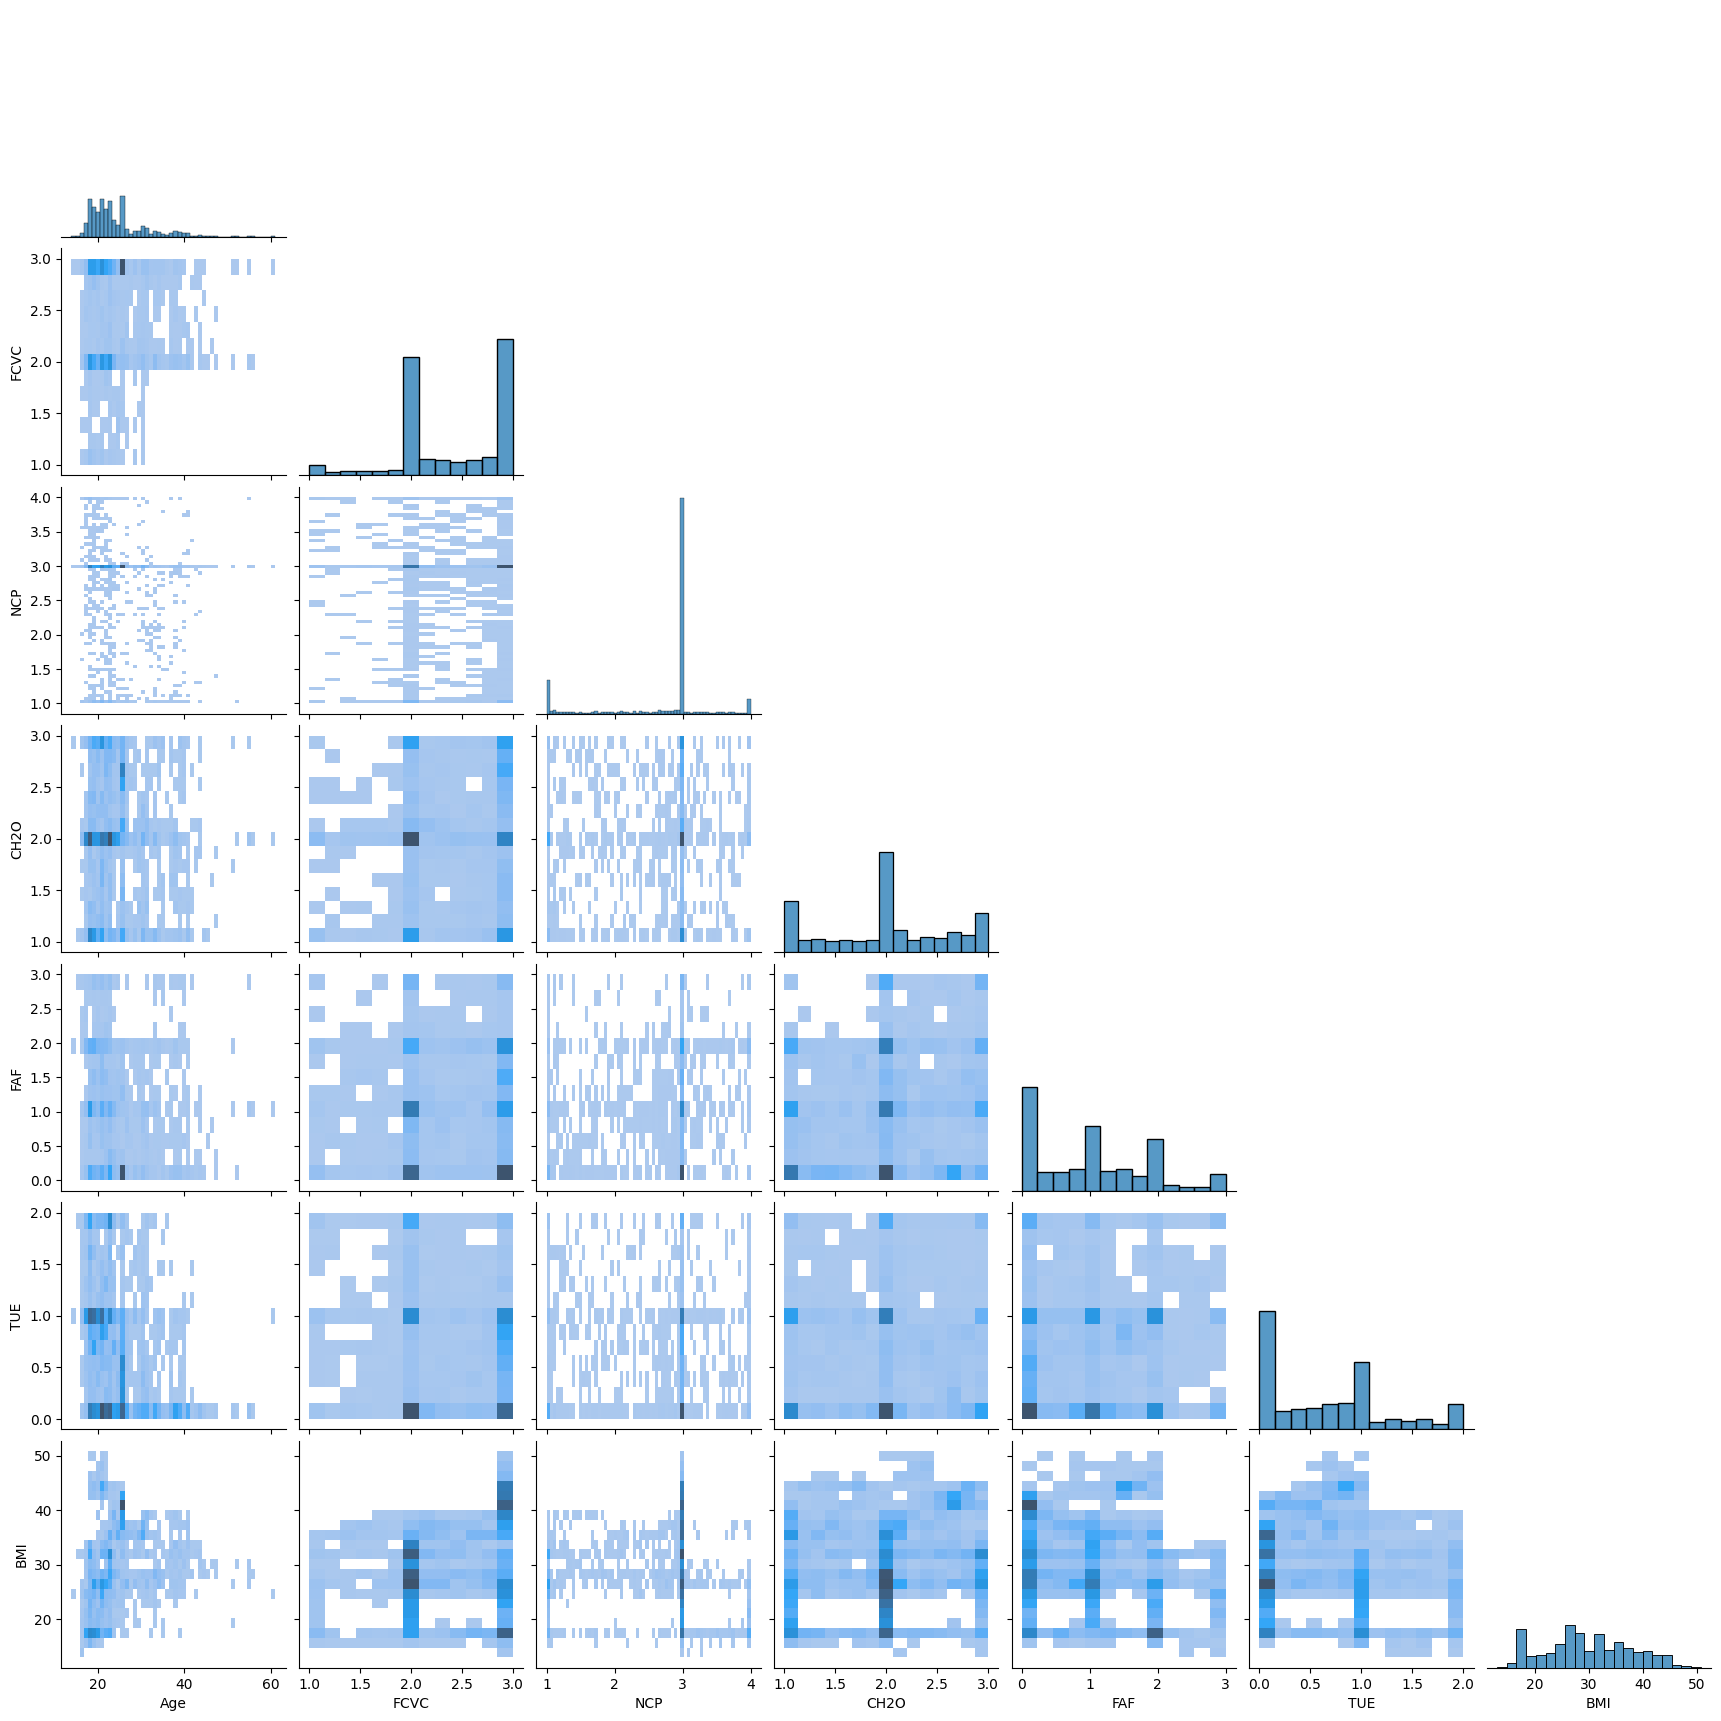

In [75]:
sns.pairplot(df, corner=True, kind = 'hist');

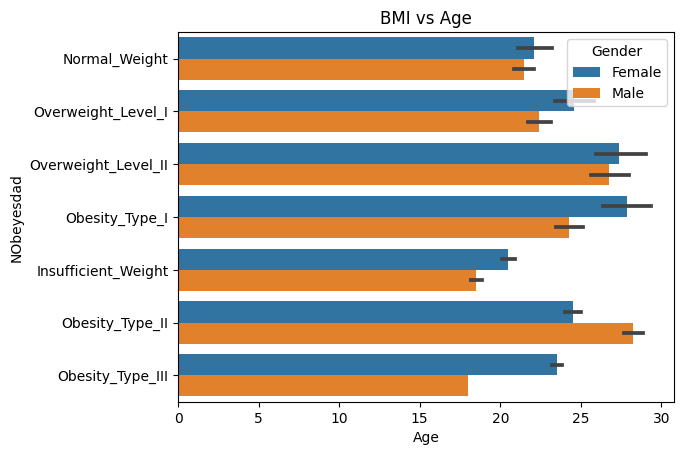

In [92]:
sns.barplot(data=df, y="NObeyesdad", x="Age", hue = 'Gender').set_title('BMI vs Age');

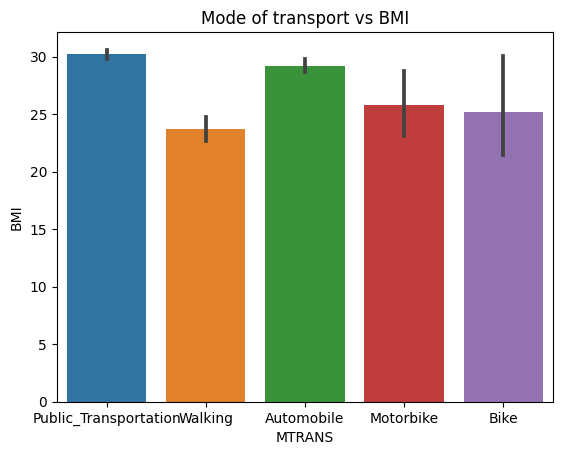

In [76]:
sns.barplot(data=df,x='MTRANS',y='BMI').set_title('Mode of transport vs BMI');

People who walk have lowest BMI 

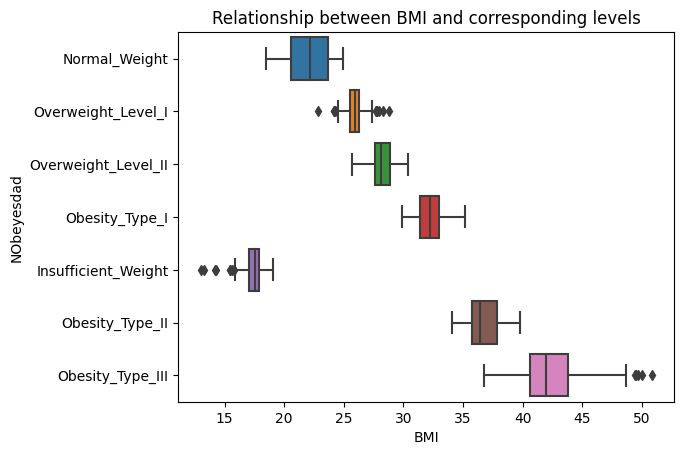

In [96]:
sns.boxplot(data=df, y="NObeyesdad", x="BMI",).set_title('Relationship between BMI and corresponding levels');

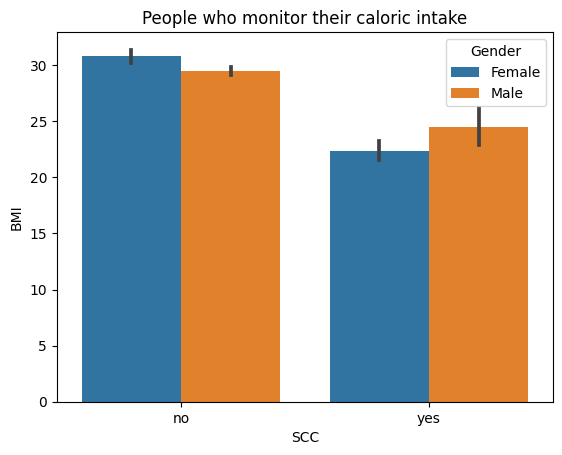

In [91]:
sns.barplot(data=df,x='SCC',y='BMI',hue='Gender').set_title('People who monitor their calorie intake');

Note : People who monitor their calorie intake seem to have lower BMI, however we should acknowledge obsessively tracking calorie intake is dangerous for individuals with eating disorder.

## Transform Categorical features to Numerical

In [121]:
collection = {}
def cat_to_num(col):
  values= df[col].unique()
  ind = range(len(values))
  dic=dict(zip(values,ind))
  collection[col] = dic
  df[col].replace(dic,inplace=True) 


In [118]:
for col in df.select_dtypes('object').columns:
  cat_to_num(col)

In [120]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,0,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0,24.386526
1,0,21.0,0,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0,24.238227
2,1,23.0,0,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0,23.765432
3,1,27.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1,26.851852
4,1,22.0,1,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2,28.342381


### Correlation

In [126]:
df.corr().sort_values(by = 'NObeyesdad',ascending=False).NObeyesdad

NObeyesdad                        1.000000
BMI                               0.662191
FCVC                              0.339929
FAVC                              0.226236
NCP                               0.146897
CALC                              0.098210
CH2O                              0.081002
Age                               0.080222
SMOKE                            -0.031886
TUE                              -0.042238
Gender                           -0.127926
FAF                              -0.142296
MTRANS                           -0.148298
SCC                              -0.172887
CAEC                             -0.262454
family_history_with_overweight   -0.267888
Name: NObeyesdad, dtype: float64

<Axes: >

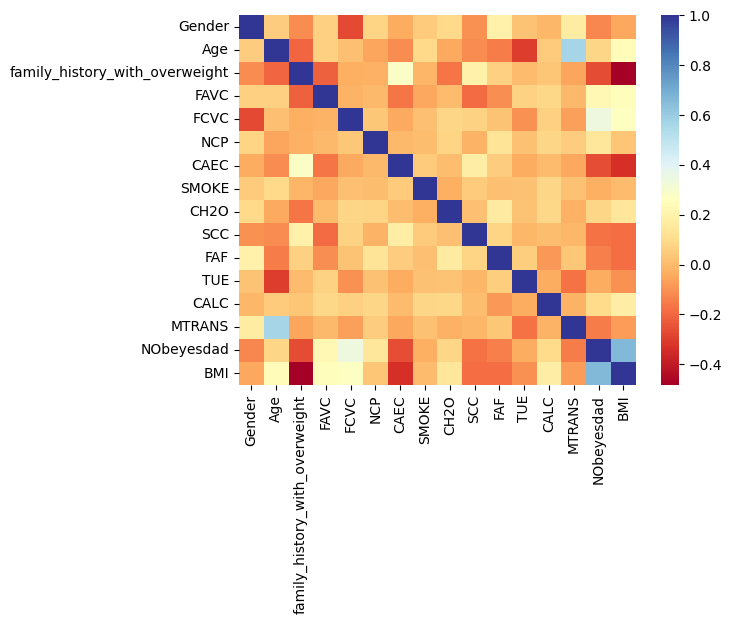

In [133]:
sns.heatmap(df.corr(),cmap ="RdYlBu",)

Thank you for tagging along.

Feedback is appreciated.
